In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import  pandas as pd

In [51]:
pd = pd.read_csv('data/TAU-urban-acoustic-scenes-2022-mobile-development/meta.csv',sep = '\t')

print(pd.head())

                                  filename scene_label   identifier  \
0  audio/airport-lisbon-1000-40000-0-a.wav     airport  lisbon-1000   
1  audio/airport-lisbon-1000-40000-1-a.wav     airport  lisbon-1000   
2  audio/airport-lisbon-1000-40000-2-a.wav     airport  lisbon-1000   
3  audio/airport-lisbon-1000-40000-3-a.wav     airport  lisbon-1000   
4  audio/airport-lisbon-1000-40000-4-a.wav     airport  lisbon-1000   

  source_label  
0            a  
1            a  
2            a  
3            a  
4            a  


In [52]:
#Basic statistics
print(pd.describe())



                                   filename scene_label   identifier  \
count                                230350      230350       230350   
unique                               230350          10          514   
top     audio/tram-lyon-1103-43145-9-s6.wav         bus  barcelona-1   
freq                                      1       23040         1250   

       source_label  
count        230350  
unique            9  
top               a  
freq         144000  


In [53]:
# Get a new column with samples grouped by their last digit
def get_last_digit(filename):
    #Remove the extension
    filename = filename[:-4]
    # Save the device (separated by -)
    dev = filename.split('-')[-1:]
    filename_switched = filename.split('-')
    # Switch up the last two parts of the filename
    filename = filename_switched[:-2] + filename_switched[-1:]
    # Join the remaining parts
    filename = '-'.join(filename)
    return filename
print(get_last_digit('audio/airport-lisbon-1000-40000-0-1-a.wav'))
print(pd['filename'].apply(get_last_digit))
print(pd.head())

audio/airport-lisbon-1000-40000-0-a
0         audio/airport-lisbon-1000-40000-a
1         audio/airport-lisbon-1000-40000-a
2         audio/airport-lisbon-1000-40000-a
3         audio/airport-lisbon-1000-40000-a
4         audio/airport-lisbon-1000-40000-a
                        ...                
230345        audio/tram-lyon-1103-43145-s6
230346        audio/tram-lyon-1103-43145-s6
230347        audio/tram-lyon-1103-43145-s6
230348        audio/tram-lyon-1103-43145-s6
230349        audio/tram-lyon-1103-43145-s6
Name: filename, Length: 230350, dtype: object
                                  filename scene_label   identifier  \
0  audio/airport-lisbon-1000-40000-0-a.wav     airport  lisbon-1000   
1  audio/airport-lisbon-1000-40000-1-a.wav     airport  lisbon-1000   
2  audio/airport-lisbon-1000-40000-2-a.wav     airport  lisbon-1000   
3  audio/airport-lisbon-1000-40000-3-a.wav     airport  lisbon-1000   
4  audio/airport-lisbon-1000-40000-4-a.wav     airport  lisbon-1000   

  sourc

In [54]:
# Get a groupby using get_last_digit without column
for id, group in pd.groupby(pd['filename'].apply(get_last_digit)):
    print(id)
    break
    for file in group['filename']:
        print(file)


audio/airport-barcelona-0-0-a


In [61]:
# Load mel spectrogram from file located at data/cache
import torch
def load_mel_spectrogram(filename):
    mel = torch.load('data/cache/' + filename + '.pt')
    return mel.cpu()
def load_mel_spectrogram_shifted(filename):
    mel = torch.load('data/cache/shifted/0.8/audio/' + filename + '.pt')
    return mel.cpu()
print(load_mel_spectrogram('airport-barcelona-0-2-0-a.wav'))
# i want to listen to the audio file of this mel spectrogram reconstructed
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import numpy as np
from IPython.display import Audio
import torch
import torchaudio
import IPython


n_fft = 2048

n_stft = int((n_fft//2) + 1)
invers_transform = torchaudio.transforms.InverseMelScale(sample_rate=32000, n_stft=1025)
grifflim_transform = torchaudio.transforms.GriffinLim(n_fft=n_fft)


mel = load_mel_spectrogram('airport-barcelona-0-2-0-a.wav')
inverse_waveform = invers_transform(mel)
pseudo_waveform = grifflim_transform(inverse_waveform)
audio = pseudo_waveform.squeeze().numpy()
Audio(audio, rate=32000)

tensor([[[4.9022e+01, 3.3399e+01, 1.4146e+01,  ..., 1.3448e+01,
          3.6127e+01, 2.3649e+01],
         [1.2439e+01, 4.0226e+01, 2.4648e+01,  ..., 3.8310e+01,
          1.0927e+02, 1.0925e+02],
         [4.2556e+01, 1.2463e+01, 4.1874e+01,  ..., 6.3799e+01,
          1.4976e+02, 5.6669e+01],
         ...,
         [1.2446e-02, 5.6777e-03, 6.6504e-03,  ..., 5.1874e-04,
          8.8199e-04, 4.0867e-03],
         [1.1269e-02, 7.7897e-03, 8.8522e-03,  ..., 5.3327e-04,
          6.8333e-04, 4.2150e-03],
         [1.3524e-02, 1.0251e-02, 1.1739e-02,  ..., 5.4959e-04,
          6.0991e-04, 3.9646e-03]]])


In [59]:
mel = load_mel_spectrogram_shifted('airport-barcelona-0-2-0-a.wav')
inverse_waveform = invers_transform(mel)
pseudo_waveform = grifflim_transform(inverse_waveform)
audio = pseudo_waveform.squeeze().numpy()
Audio(audio, rate=32000)

In [57]:
#load original audio
audio, sr = torchaudio.load('data/TAU-urban-acoustic-scenes-2022-mobile-development/audio/airport-barcelona-0-2-0-a.wav')
audio = audio.squeeze().numpy()
Audio(audio, rate=32000)

In [5]:
#Name of unique classes in column scene_label
print(pd.scene_label.unique())

['airport' 'bus' 'metro' 'metro_station' 'park' 'public_square'
 'shopping_mall' 'street_pedestrian' 'street_traffic' 'tram']


In [6]:
#Number of unique values
print(pd.nunique())



filename        230350
scene_label         10
identifier         514
source_label         9
dtype: int64


In [7]:
#Number of values in each column
print(pd.count())



filename        230350
scene_label     230350
identifier      230350
source_label    230350
dtype: int64


In [8]:
#Number of values for column 'scene_label'
print(pd['scene_label'].value_counts())


scene_label
bus                  23040
metro                23040
street_traffic       23040
metro_station        23040
park                 23040
street_pedestrian    23040
shopping_mall        23030
public_square        23030
tram                 23030
airport              23020
Name: count, dtype: int64


In [26]:
#Number of values for column 'identifier'
print(pd['identifier'].value_counts())


identifier
barcelona-1    1250
london-256     1230
london-131     1080
milan-1084     1080
helsinki-45    1000
               ... 
prague-1071     100
lisbon-1106      90
lyon-1091        80
milan-1209       50
london-71        20
Name: count, Length: 514, dtype: int64


In [24]:
#Number of values for column 'identifier', separated by scene_label
print(pd.groupby('scene_label')['identifier'].value_counts())




scene_label  identifier 
airport      barcelona-1    1250
             helsinki-3      890
             vienna-13       890
             london-6        850
             helsinki-4      840
                            ... 
tram         paris-192       100
             prague-1071     100
             prague-1161     100
             lyon-1091        80
             milan-1209       50
Name: count, Length: 514, dtype: int64


In [27]:
# 20 rows
print(pd[pd['identifier'] == 'barcelona-1'].head(20))



                                  filename scene_label   identifier  \
3280  audio/airport-barcelona-1-16-0-a.wav     airport  barcelona-1   
3281  audio/airport-barcelona-1-16-1-a.wav     airport  barcelona-1   
3282  audio/airport-barcelona-1-16-2-a.wav     airport  barcelona-1   
3283  audio/airport-barcelona-1-16-3-a.wav     airport  barcelona-1   
3284  audio/airport-barcelona-1-16-4-a.wav     airport  barcelona-1   
3285  audio/airport-barcelona-1-16-5-a.wav     airport  barcelona-1   
3286  audio/airport-barcelona-1-16-6-a.wav     airport  barcelona-1   
3287  audio/airport-barcelona-1-16-7-a.wav     airport  barcelona-1   
3288  audio/airport-barcelona-1-16-8-a.wav     airport  barcelona-1   
3289  audio/airport-barcelona-1-16-9-a.wav     airport  barcelona-1   
3290  audio/airport-barcelona-1-17-0-a.wav     airport  barcelona-1   
3291  audio/airport-barcelona-1-17-1-a.wav     airport  barcelona-1   
3292  audio/airport-barcelona-1-17-2-a.wav     airport  barcelona-1   
3293  

In [31]:


# Get a dataframe with the first 10 rows FOR EACH scene_label and only those rows
print(pd.groupby('scene_label').head(10))


                                       filename scene_label   identifier  \
0       audio/airport-lisbon-1000-40000-0-a.wav     airport  lisbon-1000   
1       audio/airport-lisbon-1000-40000-1-a.wav     airport  lisbon-1000   
2       audio/airport-lisbon-1000-40000-2-a.wav     airport  lisbon-1000   
3       audio/airport-lisbon-1000-40000-3-a.wav     airport  lisbon-1000   
4       audio/airport-lisbon-1000-40000-4-a.wav     airport  lisbon-1000   
...                                         ...         ...          ...   
125835     audio/tram-lisbon-1035-40042-5-a.wav        tram  lisbon-1035   
125836     audio/tram-lisbon-1035-40042-6-a.wav        tram  lisbon-1035   
125837     audio/tram-lisbon-1035-40042-7-a.wav        tram  lisbon-1035   
125838     audio/tram-lisbon-1035-40042-8-a.wav        tram  lisbon-1035   
125839     audio/tram-lisbon-1035-40042-9-a.wav        tram  lisbon-1035   

       source_label  
0                 a  
1                 a  
2                 a  

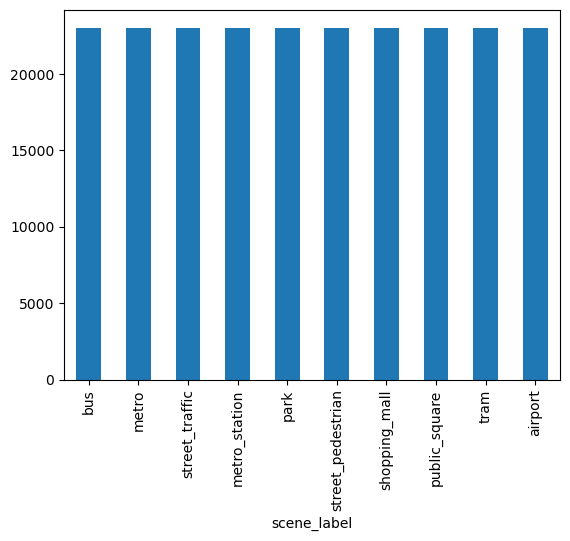

In [22]:

#Plot of the number of values for column "scene_label"
pd['scene_label'].value_counts().plot.bar()
plt.show()




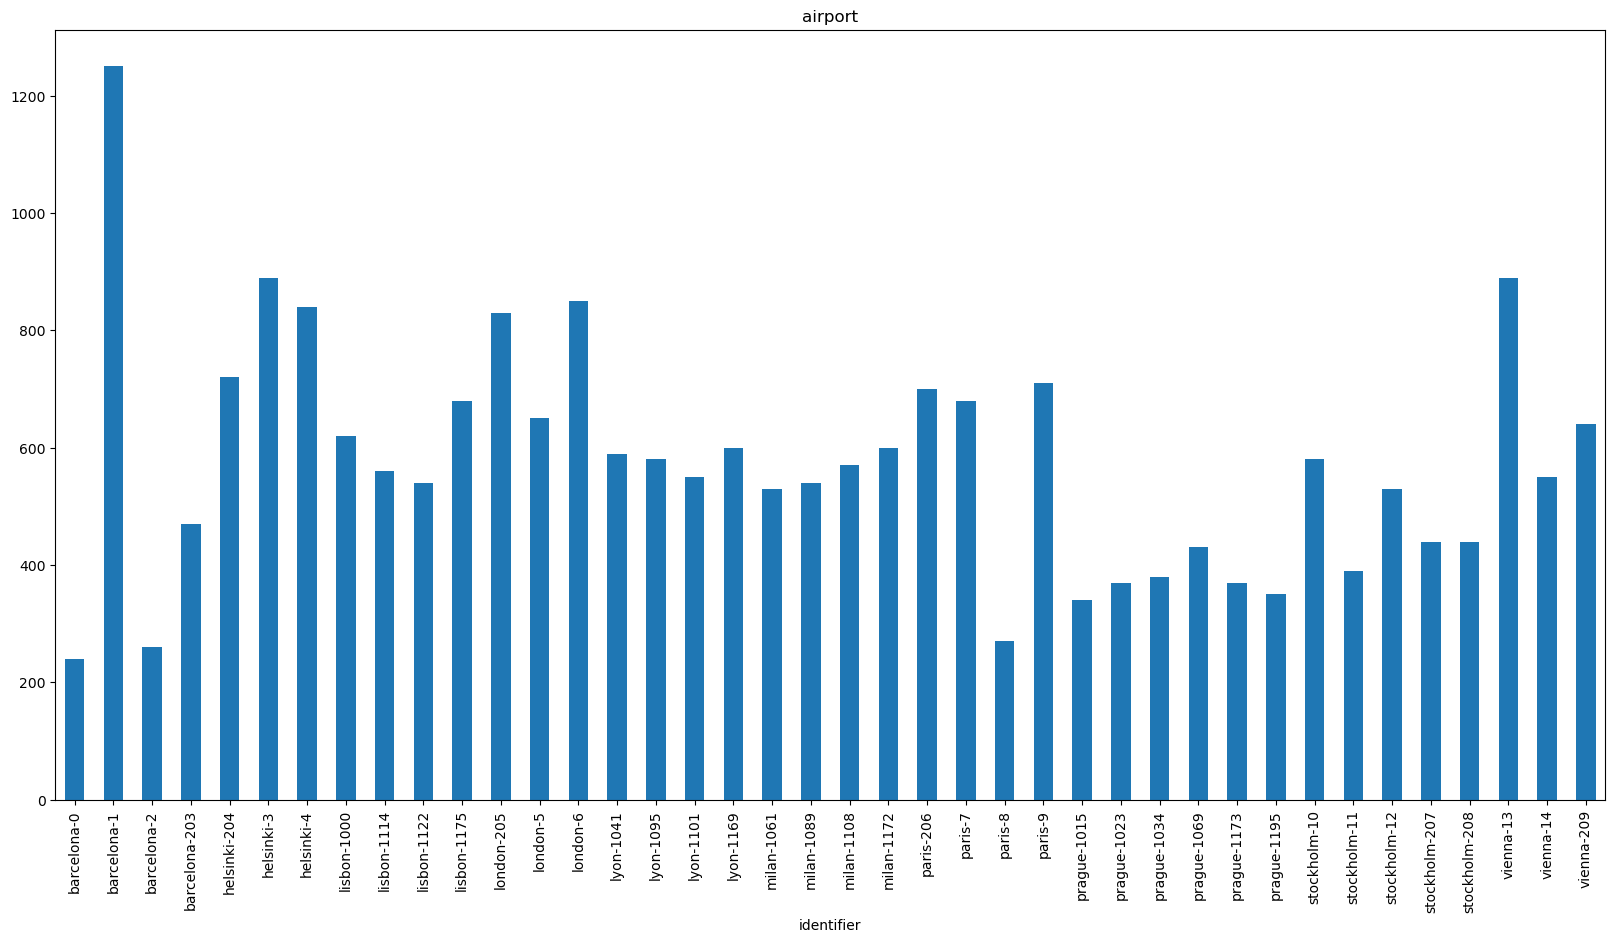

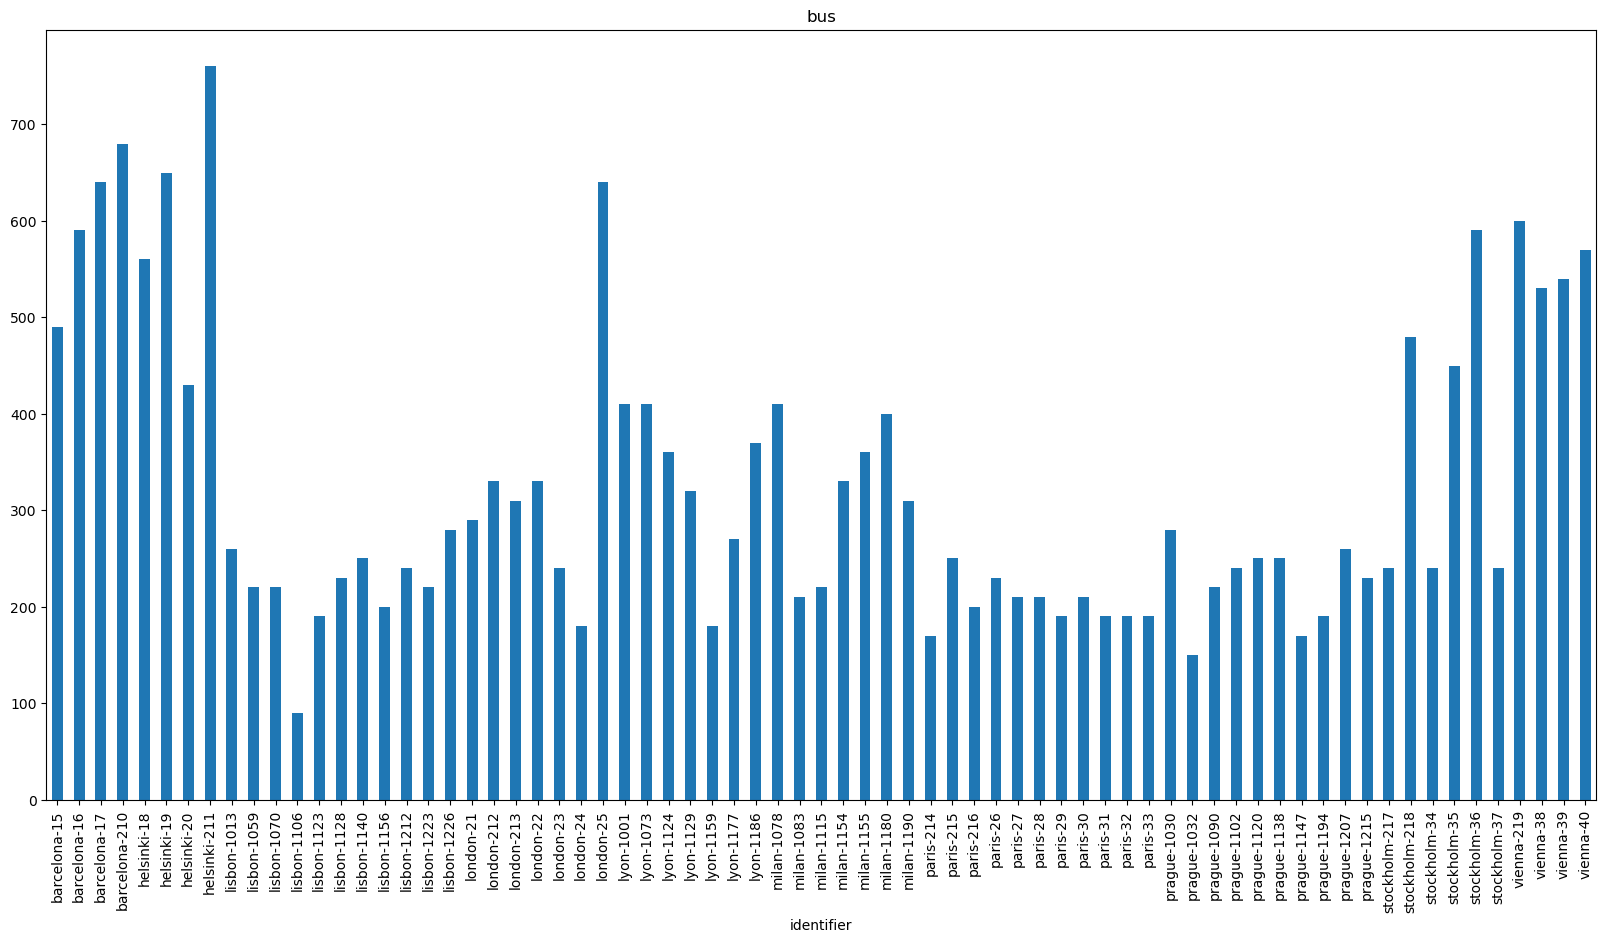

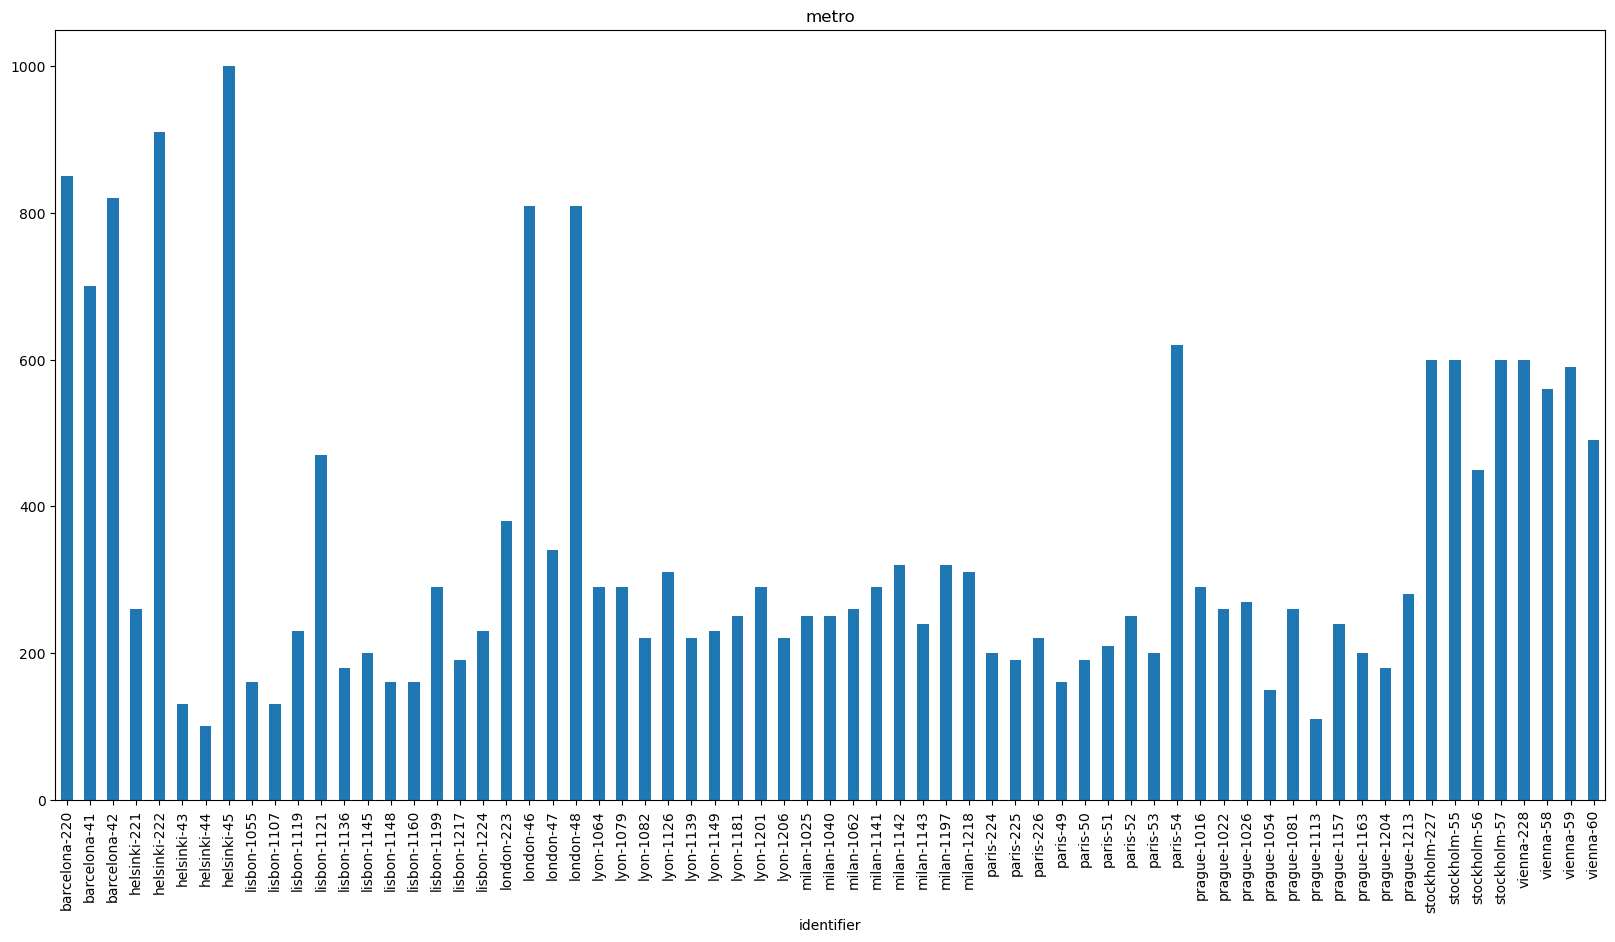

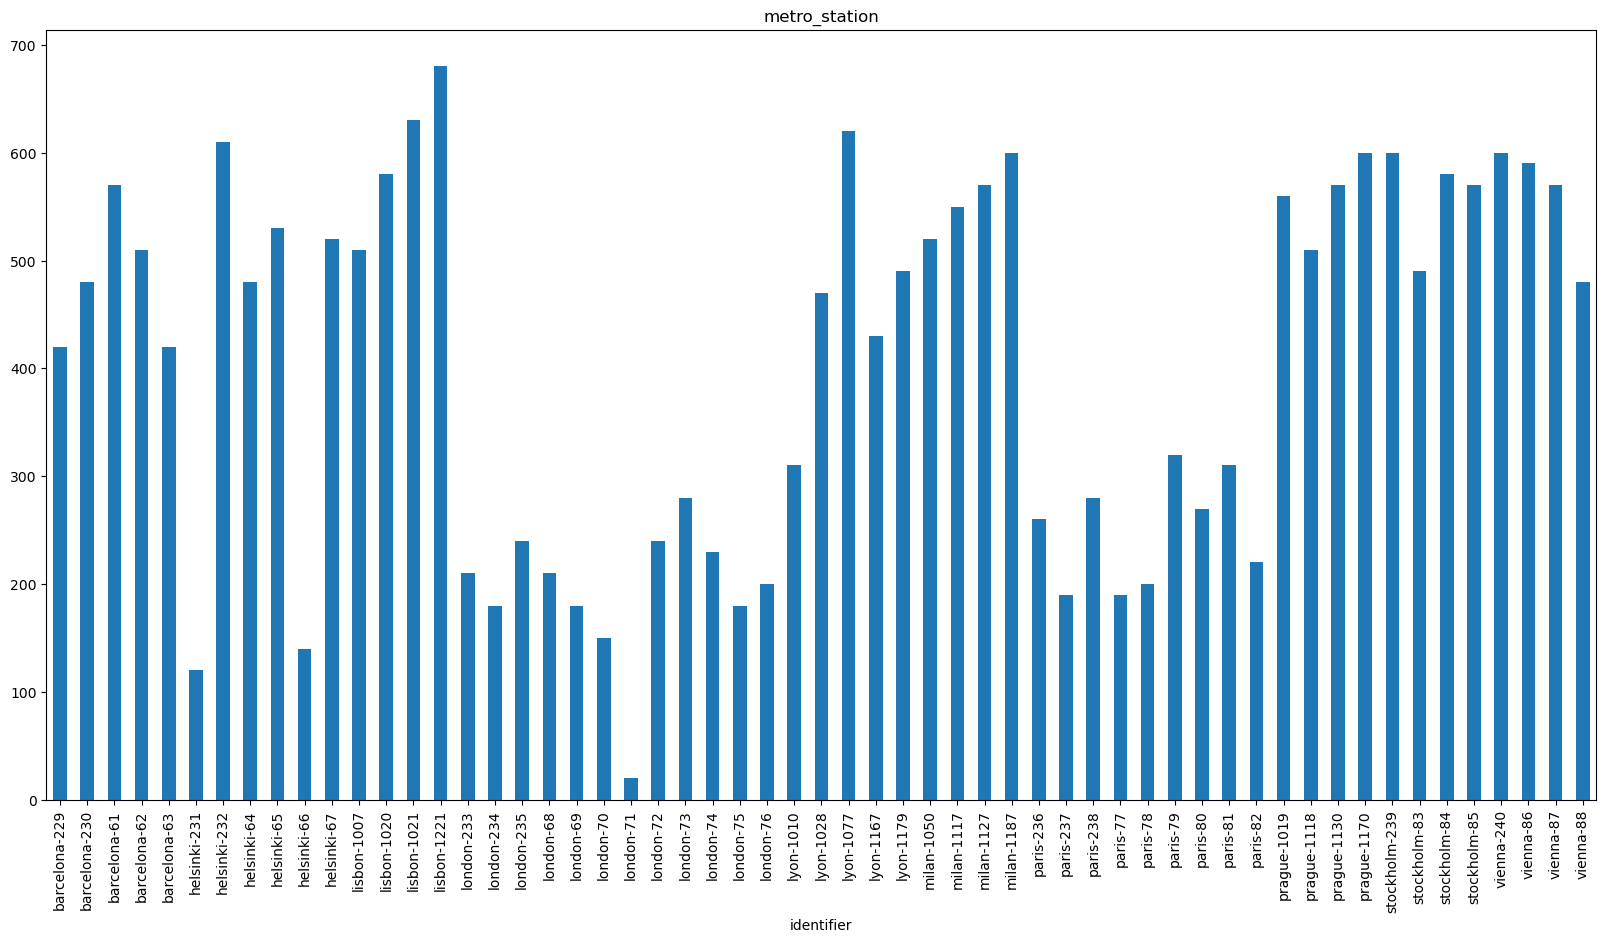

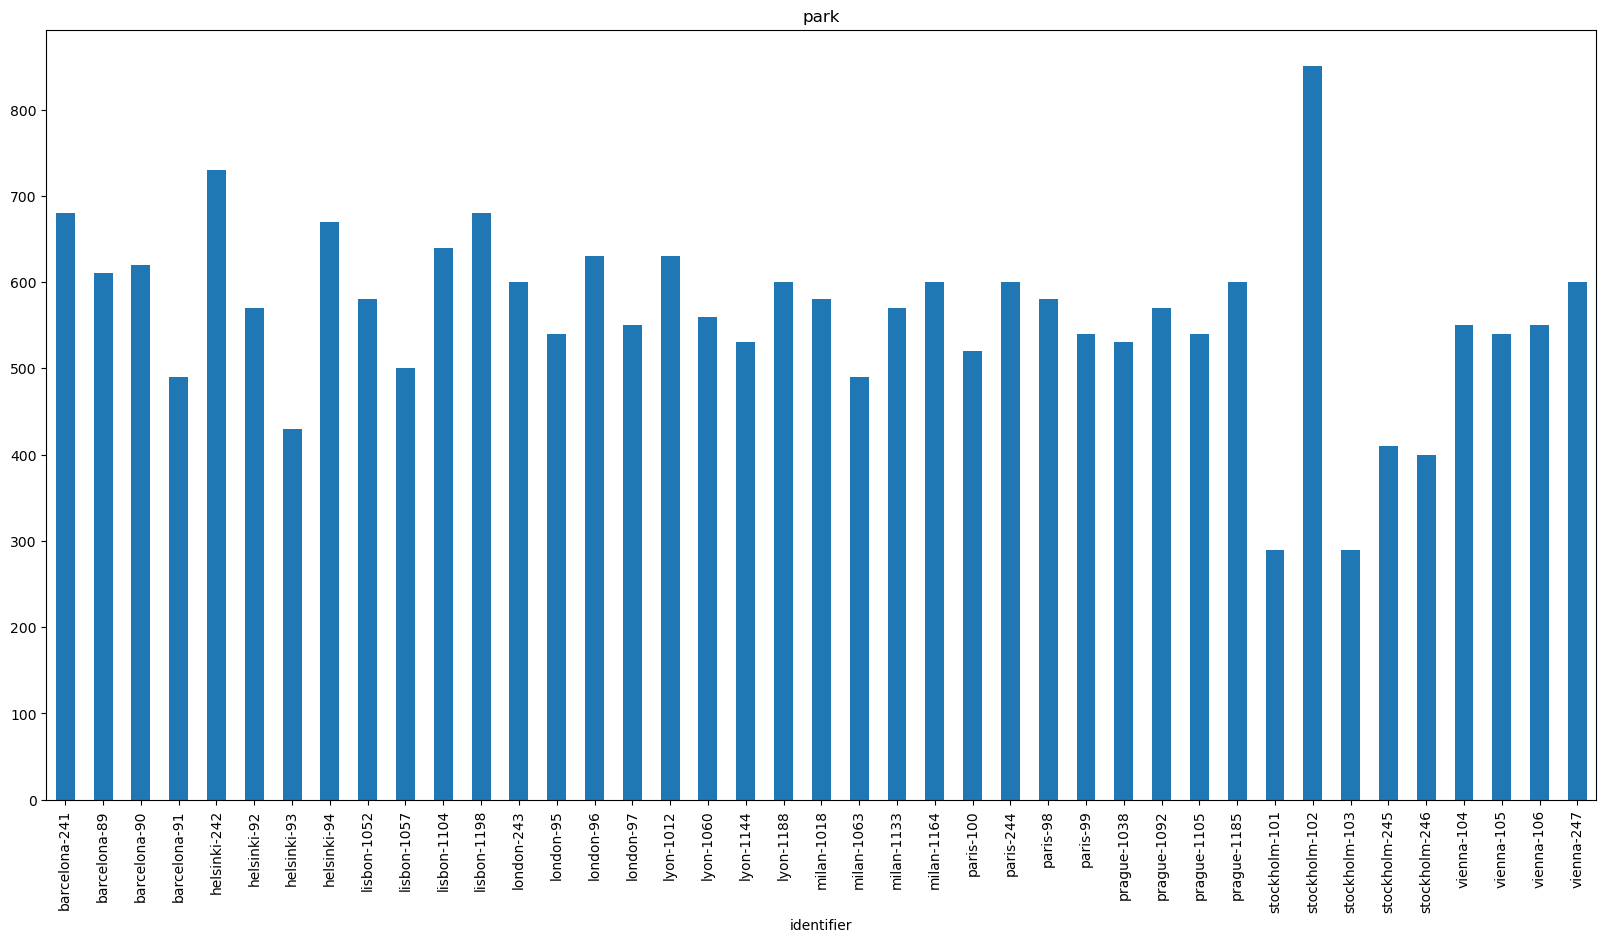

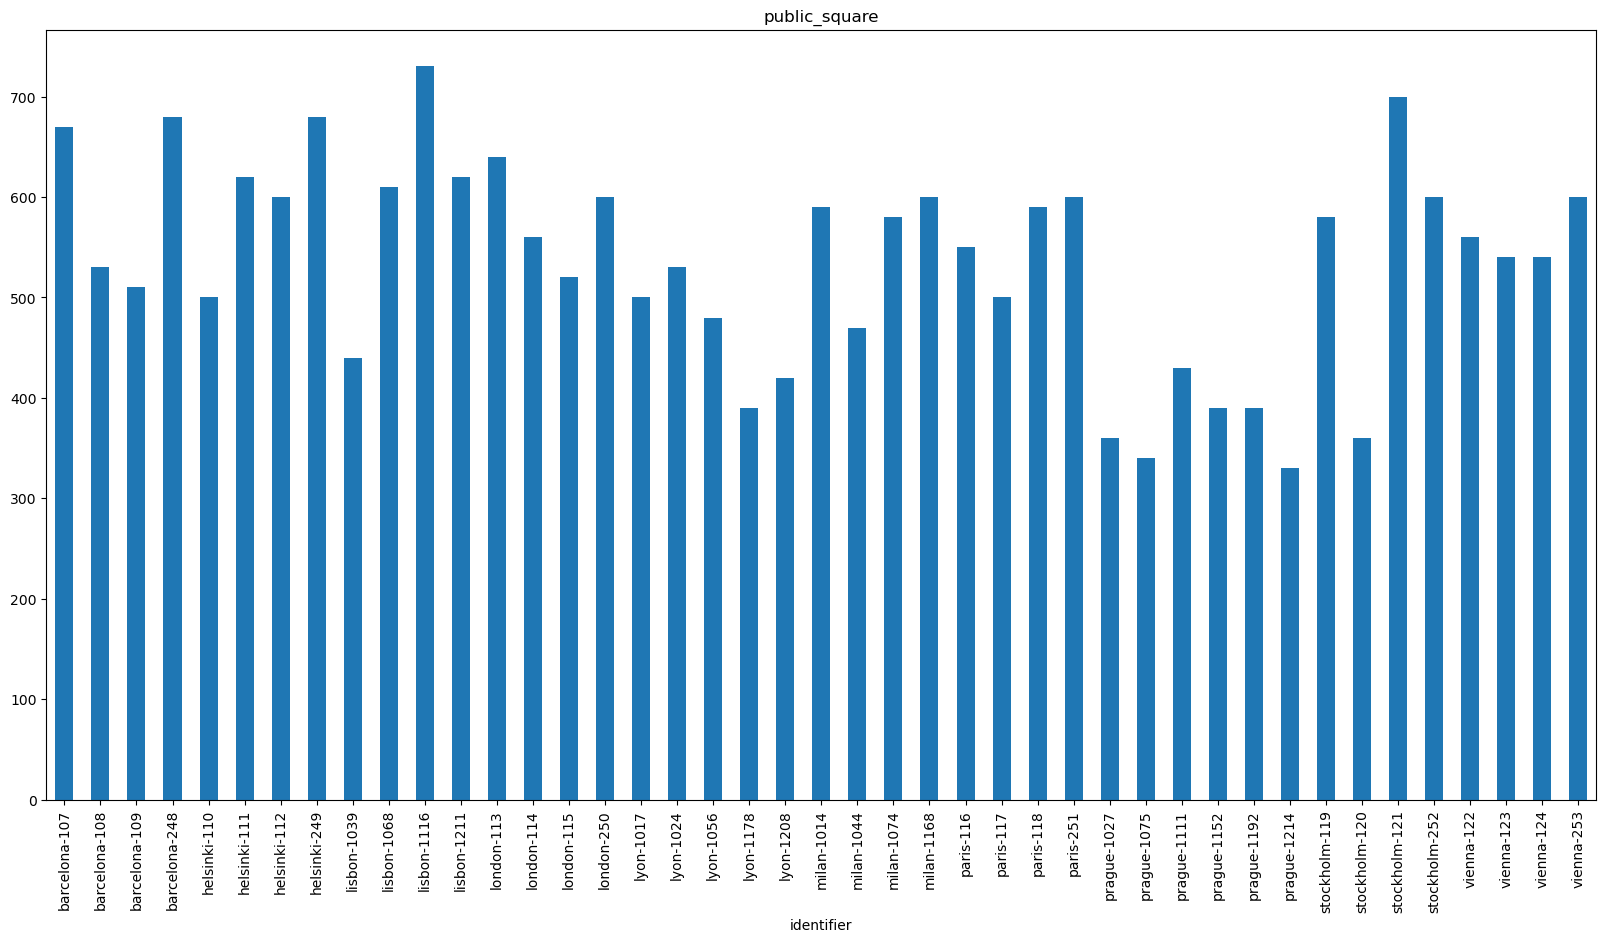

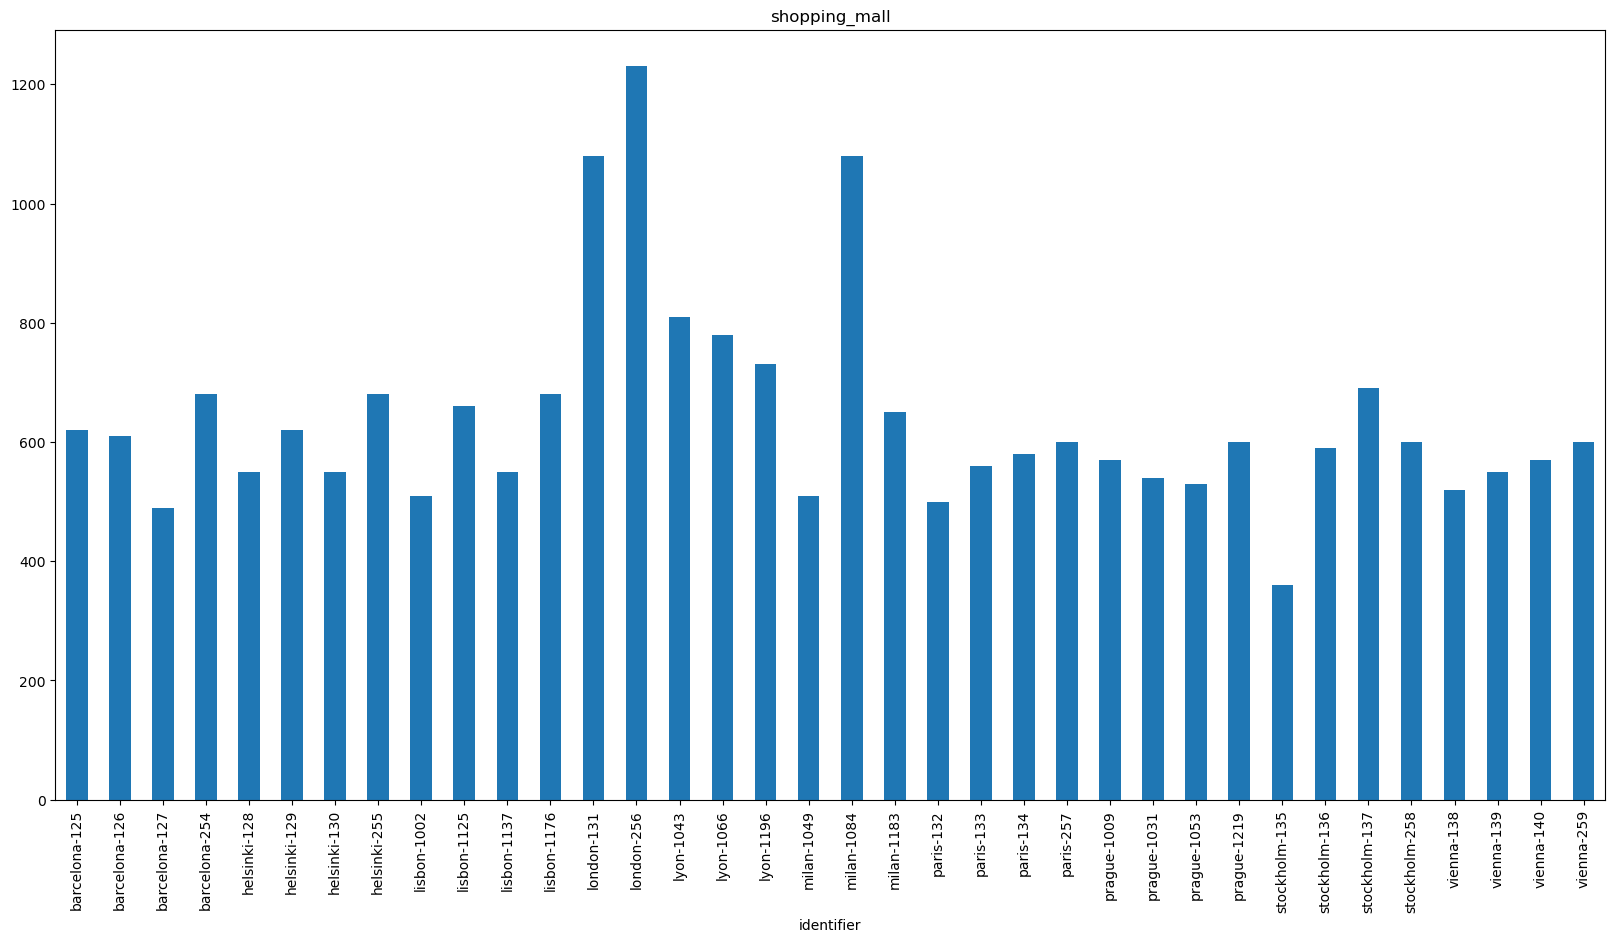

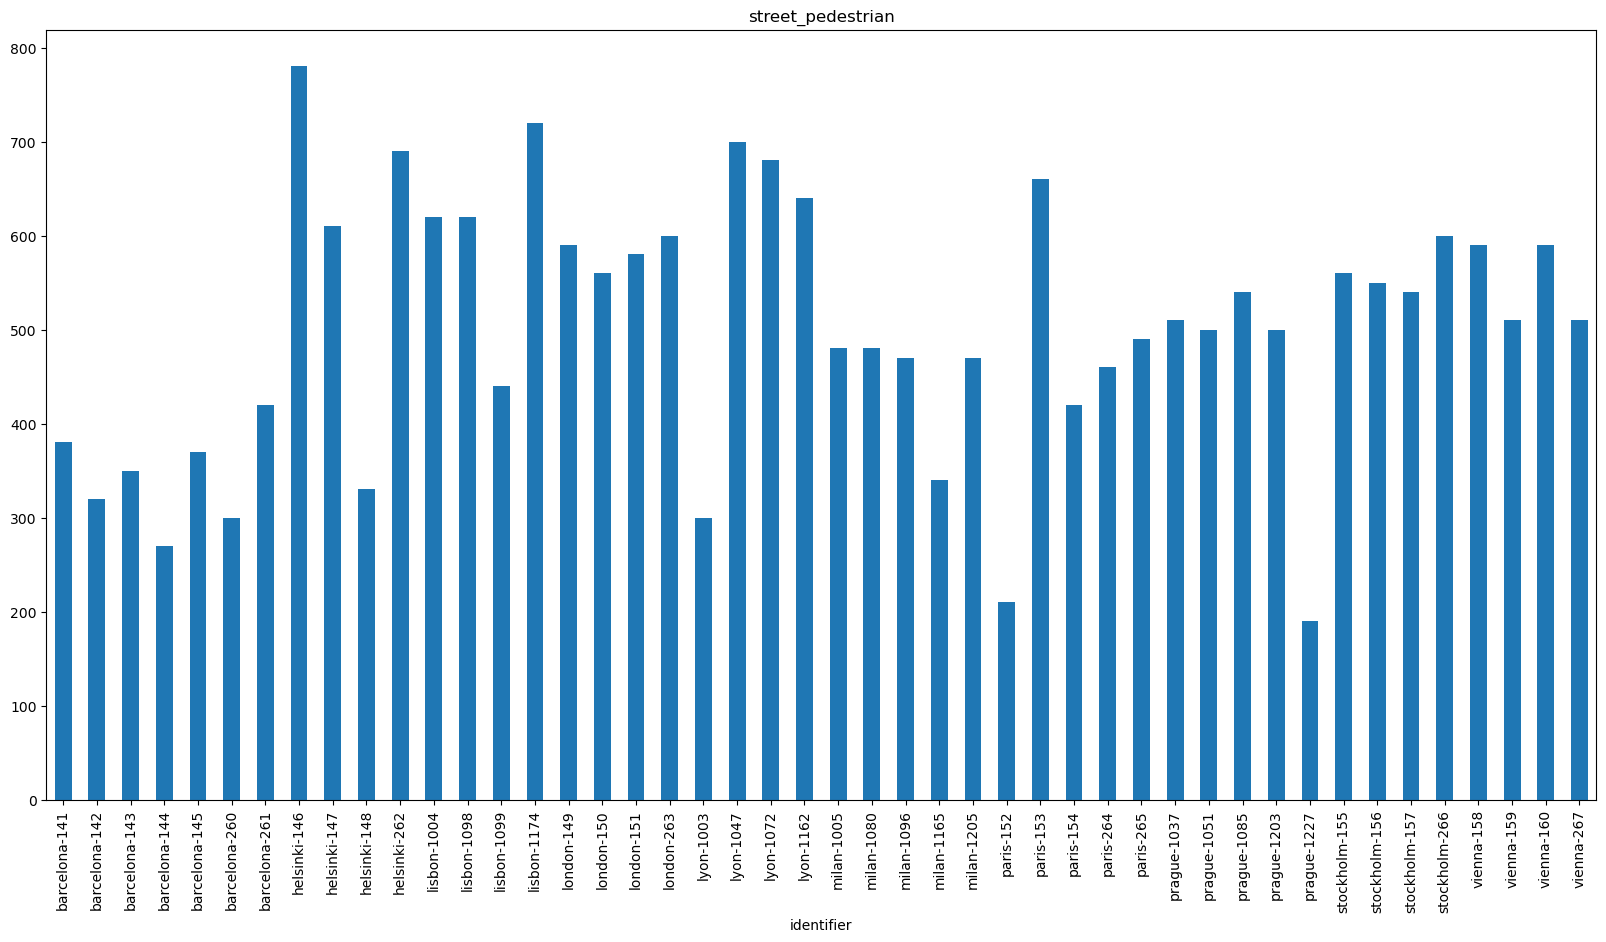

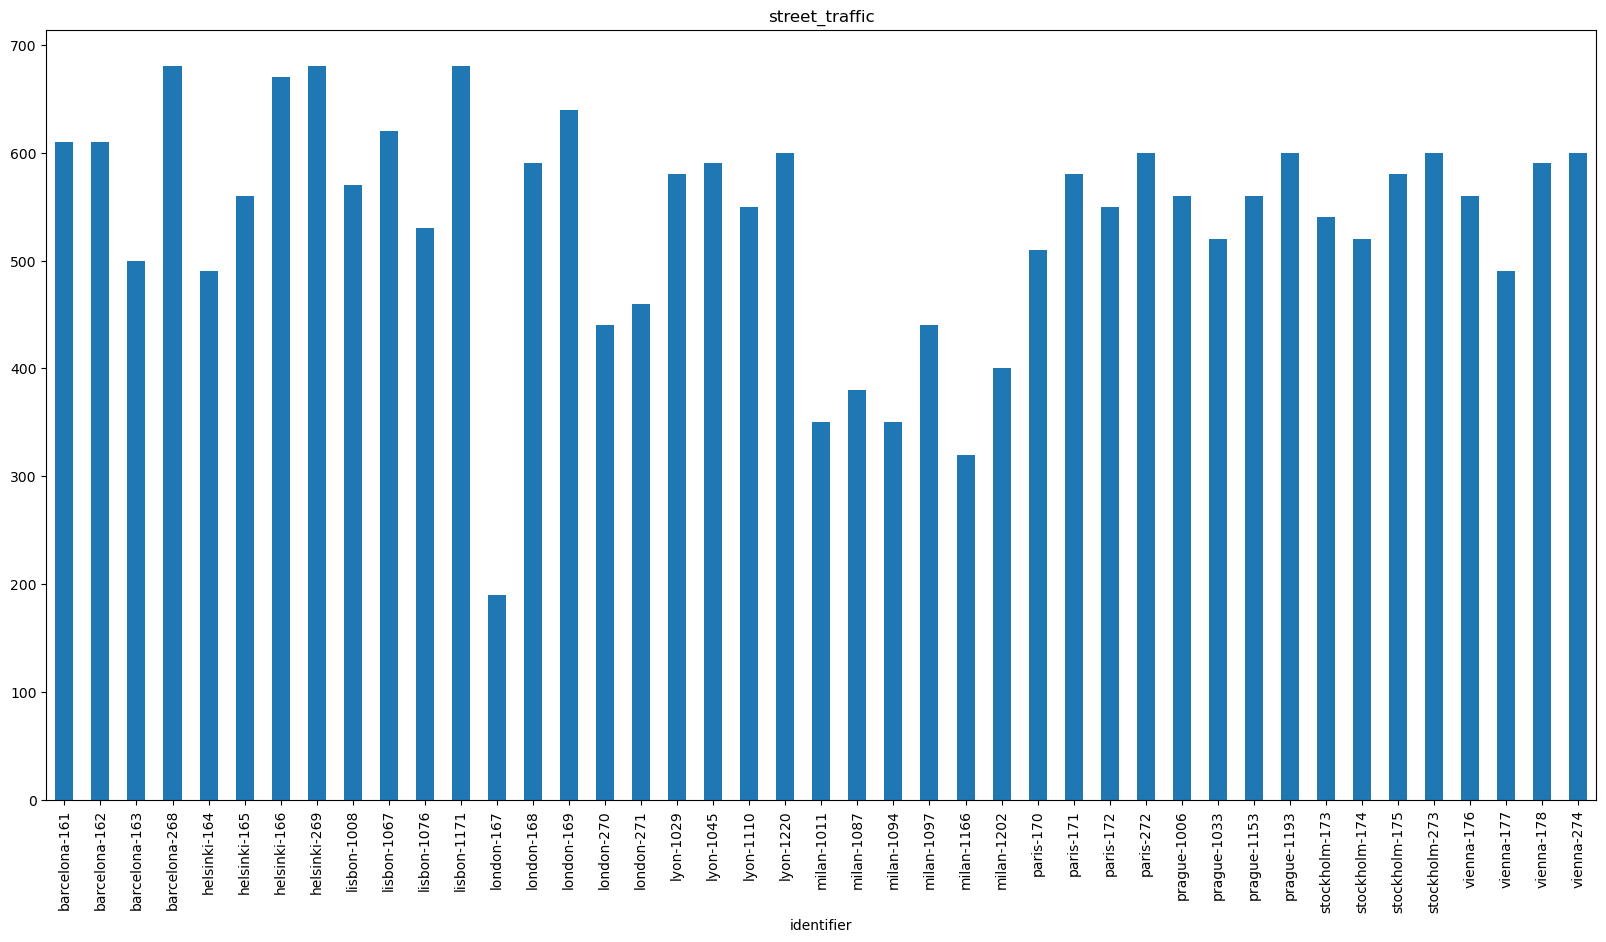

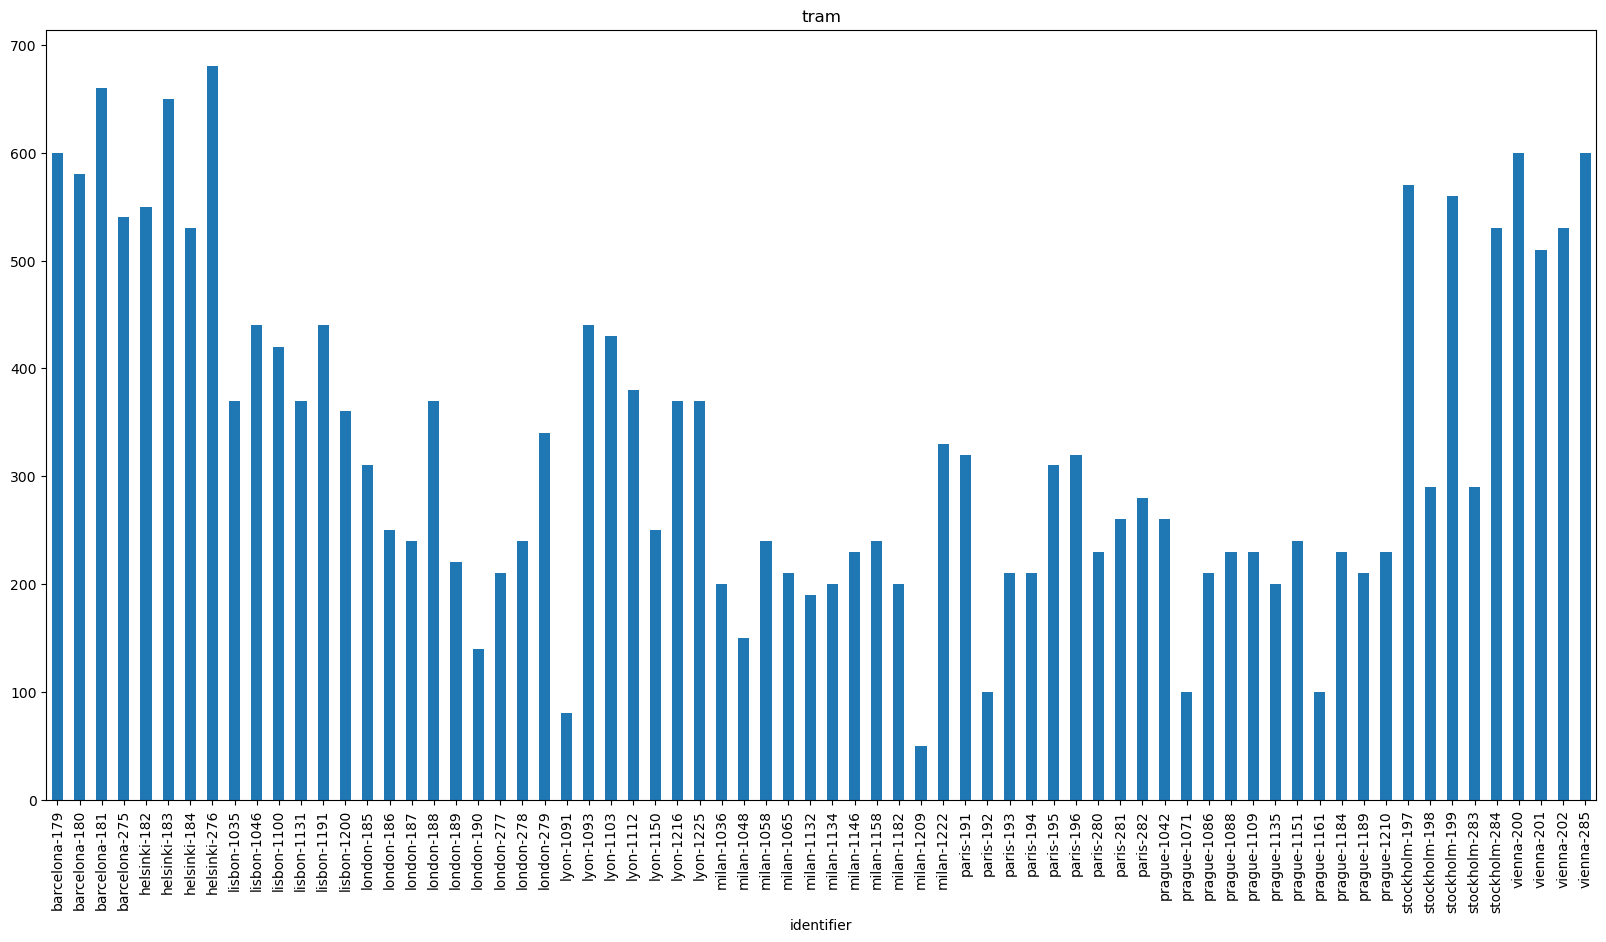

In [12]:

tags = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square', 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

for tag in tags:
    plt.figure(figsize=(20, 10))
    #Group by scene_label and identifier, and plot the number of values for each identifier na dhten plot
    pd[pd['scene_label'] == tag].groupby('identifier')['scene_label'].count().plot.bar()
    plt.title(tag)
    plt.show()
    


In [15]:
#Count of values in column "source_label"
print(pd['source_label'].value_counts())


source_label
a     144000
s2     10800
s1     10800
s4     10800
s3     10800
s5     10800
s6     10800
b      10780
c      10770
Name: count, dtype: int64


In [21]:
#Percentage of values in column "source_label" 
print(pd['source_label'].value_counts(normalize=True))


source_label
a     0.625136
s2    0.046885
s1    0.046885
s4    0.046885
s3    0.046885
s5    0.046885
s6    0.046885
b     0.046798
c     0.046755
Name: proportion, dtype: float64


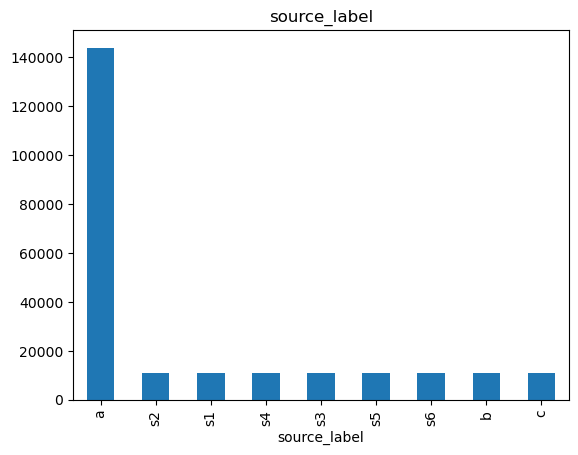

In [14]:
#Plot of values for source_label
pd['source_label'].value_counts().plot.bar()
plt.title('source_label')
plt.show()
